### Importing Libraries

In [47]:
# Importing Necessary Libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import LabelEncoder



### Load and Inspect data

In [48]:
dataset = pd.read_csv(r'C:\Users\Vishnu\Desktop\Yulu_Bike_Sharing_Demand_Prediction\data\SeoulBikeData.csv', encoding='latin1')


pd.set_option('display.max_columns', None)

# creating the copy of the dataset 
df=dataset.copy()


### Dataset First_View 

In [49]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [50]:
df.tail(5)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [51]:
df.sample(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
6453,26/08/2018,1276,21,22.5,65,1.1,2000,15.5,0.00,0.0,0.0,Summer,No Holiday,Yes
7843,23/10/2018,1685,19,14.0,70,1.6,1265,8.6,0.00,0.0,0.0,Autumn,No Holiday,Yes
5104,01/07/2018,41,16,22.2,97,1.1,1745,21.6,0.25,1.0,0.0,Summer,No Holiday,Yes
5996,07/08/2018,1836,20,31.1,64,2.7,1770,23.4,0.02,0.0,0.0,Summer,No Holiday,Yes
7672,16/10/2018,1407,16,19.5,32,2.1,1436,2.3,1.10,0.0,0.0,Autumn,No Holiday,Yes


In [52]:
print(f'{df.shape[0]} Rows and {df.shape[1]} Columns ')

8760 Rows and 14 Columns 


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Observations** 
- 8760 Rows and 14 Columns in the dataset
- No Null values found in the dataset.
- Date column needs to changed from object into datetime time 

In [54]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [55]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [56]:
# Check Unique Values for each variable.
print("\t\t\t\t\tUnique_values_in_each_columns")
print("\t\t\t\t******************************************")
print("\n")
for i in df.columns:
  print(f"{i}:- {df[i].unique()}")
  print('\n')
  print(f"Total Unique values in {i} column --> {df[i].nunique()}")
  print("\n")
  print("*"*100)

					Unique_values_in_each_columns
				******************************************


Date:- ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018

### Data Wrangling 

In [57]:
# Changing the date type 

df['Date']=pd.to_datetime(df.Date,format= '%d/%m/%Y')
print(df['Date'].head(1))

0   2017-12-01
Name: Date, dtype: datetime64[ns]


In [58]:
# No missing values found in the data set 
df.isna().any()

Date                         False
Rented Bike Count            False
Hour                         False
Temperature(°C)              False
Humidity(%)                  False
Wind speed (m/s)             False
Visibility (10m)             False
Dew point temperature(°C)    False
Solar Radiation (MJ/m2)      False
Rainfall(mm)                 False
Snowfall (cm)                False
Seasons                      False
Holiday                      False
Functioning Day              False
dtype: bool

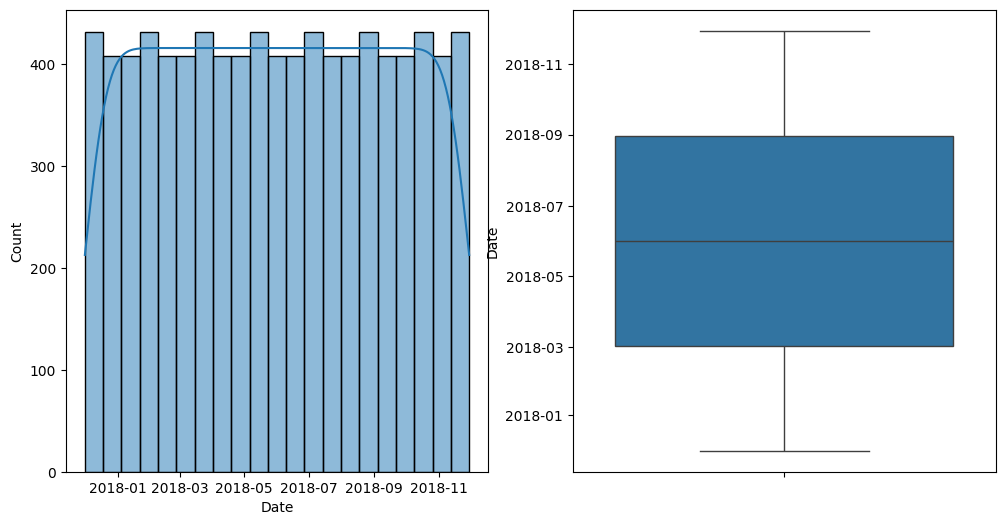

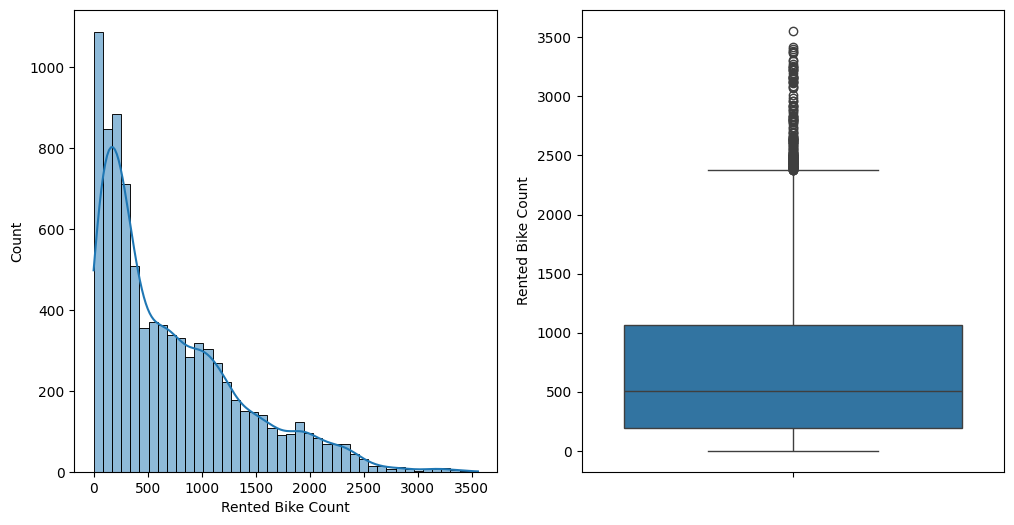

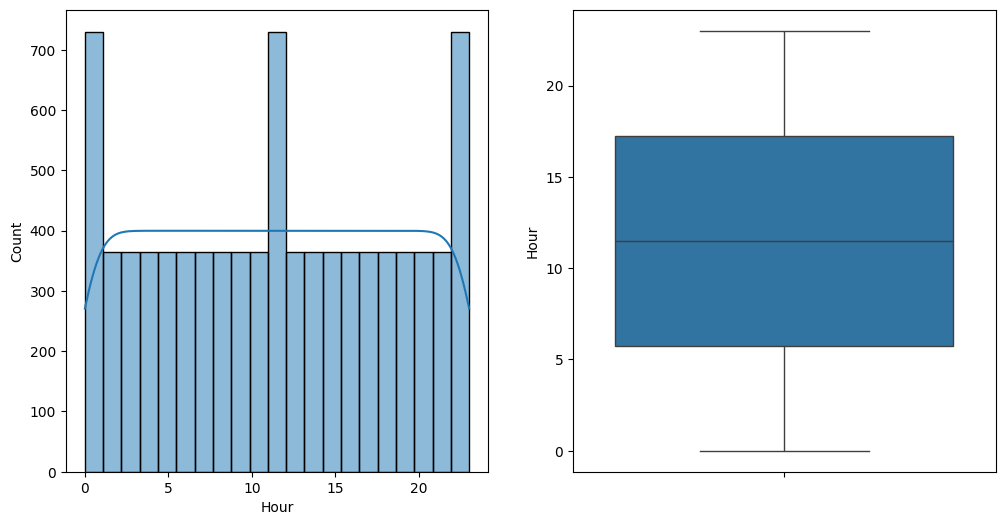

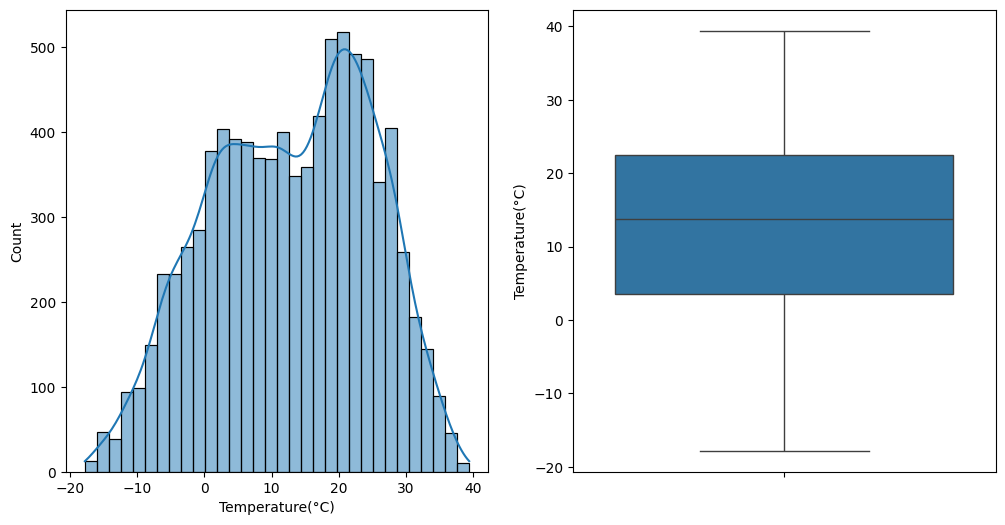

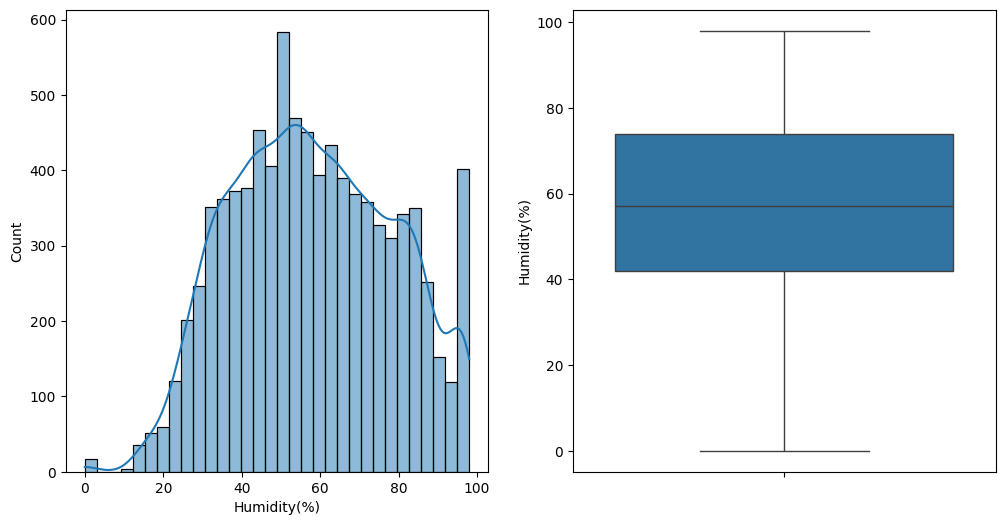

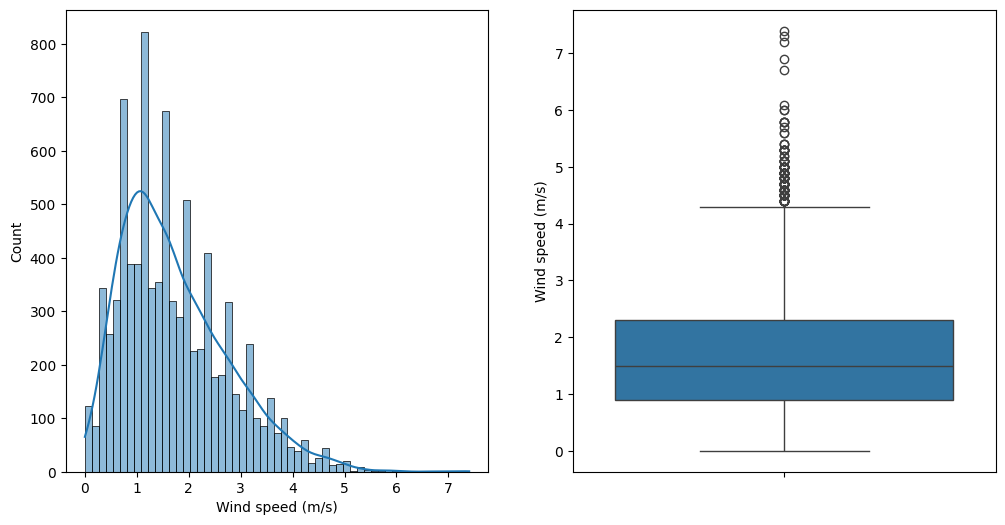

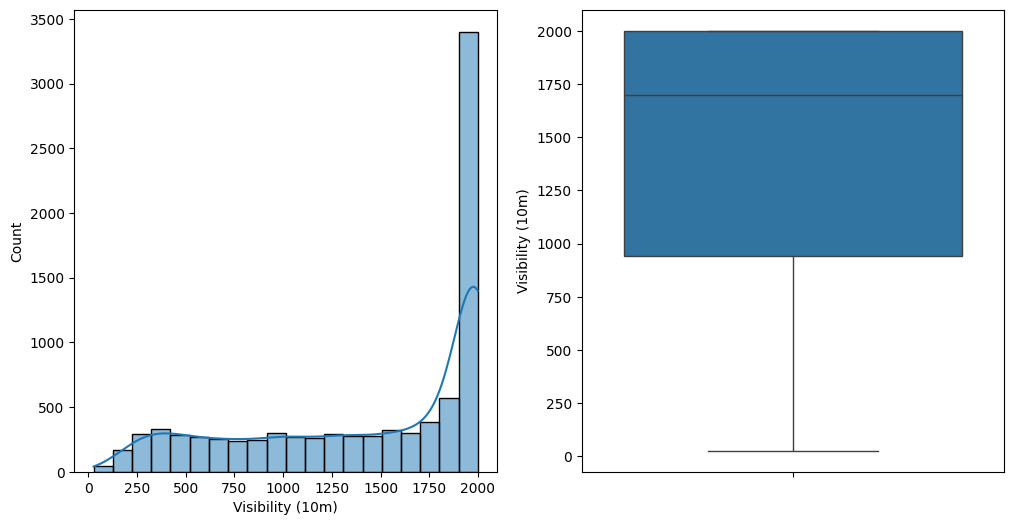

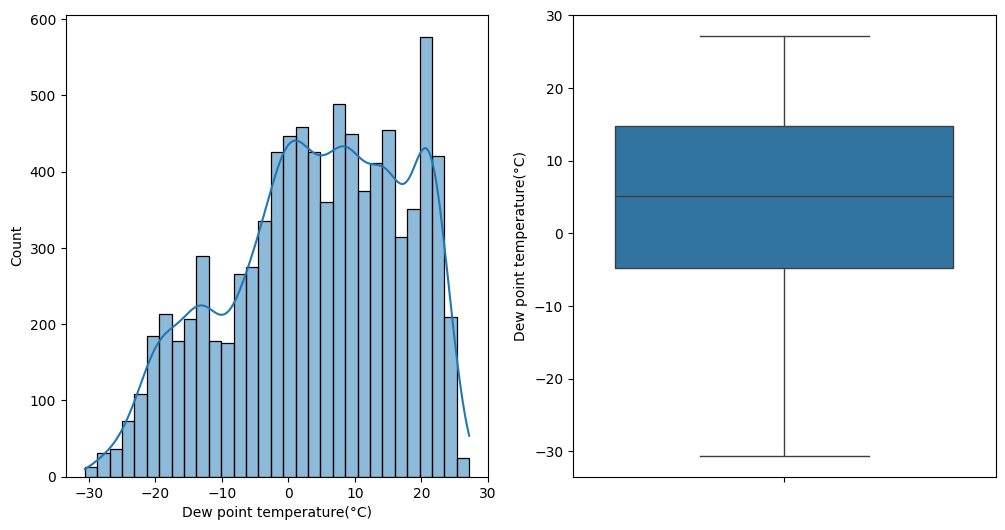

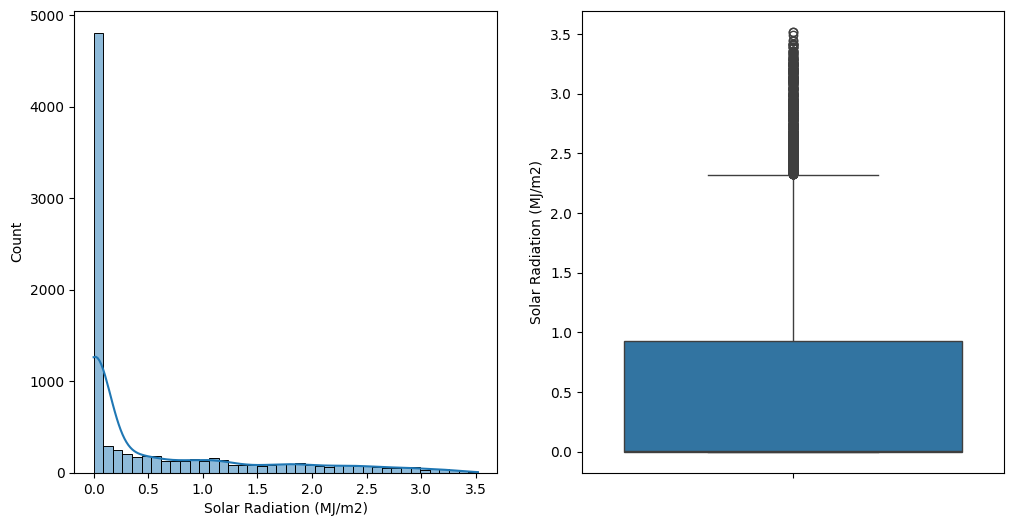

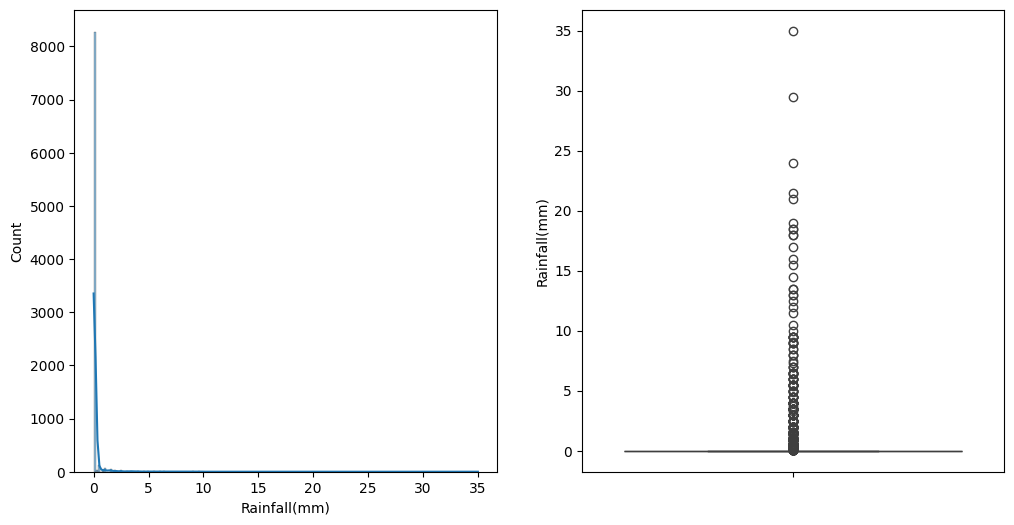

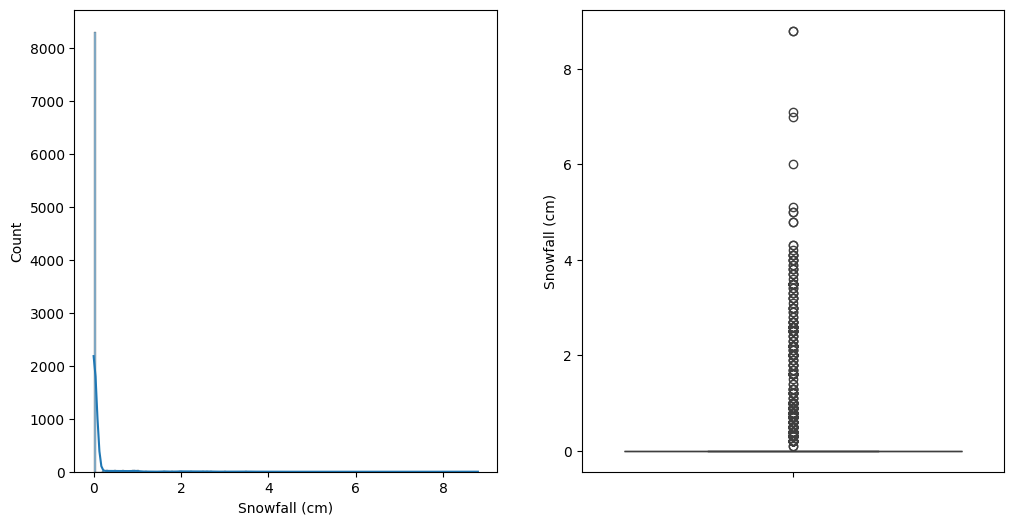

In [59]:
# Checking for outliers and distributions.

# Using Numerical columns
data=df.select_dtypes(exclude="object")

# For loop to covert columns into histograms and Boxplots to understand the distribution
for i in data.columns:
  plt.figure(figsize=(12,6))
  plt.subplot(121)
  sns.histplot(data[i],kde=True)
  plt.subplot(122)
  sns.boxplot(data[i])


In [60]:
col = df.select_dtypes(exclude='object').columns

for i in col:
  mean = df[i].mean()  # Mean of the column
  std = df[i].std()    # Standard deviation of the column
  outlier_pos = mean + 3*std  # Upper bound for outliers
  outlier_neg = mean - 3*std  # Lower bound for outliers
  print(round(df.loc[~((df[i]<=outlier_pos) & (df[i]>=outlier_neg))].shape[0]/df.shape[0]*100,2),f'% outliers in {i} column')



0.0 % outliers in Date column
0.76 % outliers in Rented Bike Count column
0.0 % outliers in Hour column
0.0 % outliers in Temperature(°C) column
0.0 % outliers in Humidity(%) column
0.72 % outliers in Wind speed (m/s) column
0.0 % outliers in Visibility (10m) column
0.0 % outliers in Dew point temperature(°C) column
0.97 % outliers in Solar Radiation (MJ/m2) column
1.07 % outliers in Rainfall(mm) column
1.97 % outliers in Snowfall (cm) column


In [61]:
mean = df['Rented Bike Count'].mean()  # Mean of the column
std = df['Rented Bike Count'].std()    # Standard deviation of the column
outlier_pos = mean + 3*std  # Upper bound for outliers
outlier_neg = mean - 3*std 

# df['Rented Bike Count']<outlier_neg or df['Rented Bike Count']>outlier_pos



In [62]:
df.loc[(df['Rented Bike Count'] < outlier_neg)]


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


In [63]:
# outliers cannot be removed as all are giving important pattern and information , no souch data entry found 

In [64]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### EDA and Visulaisation

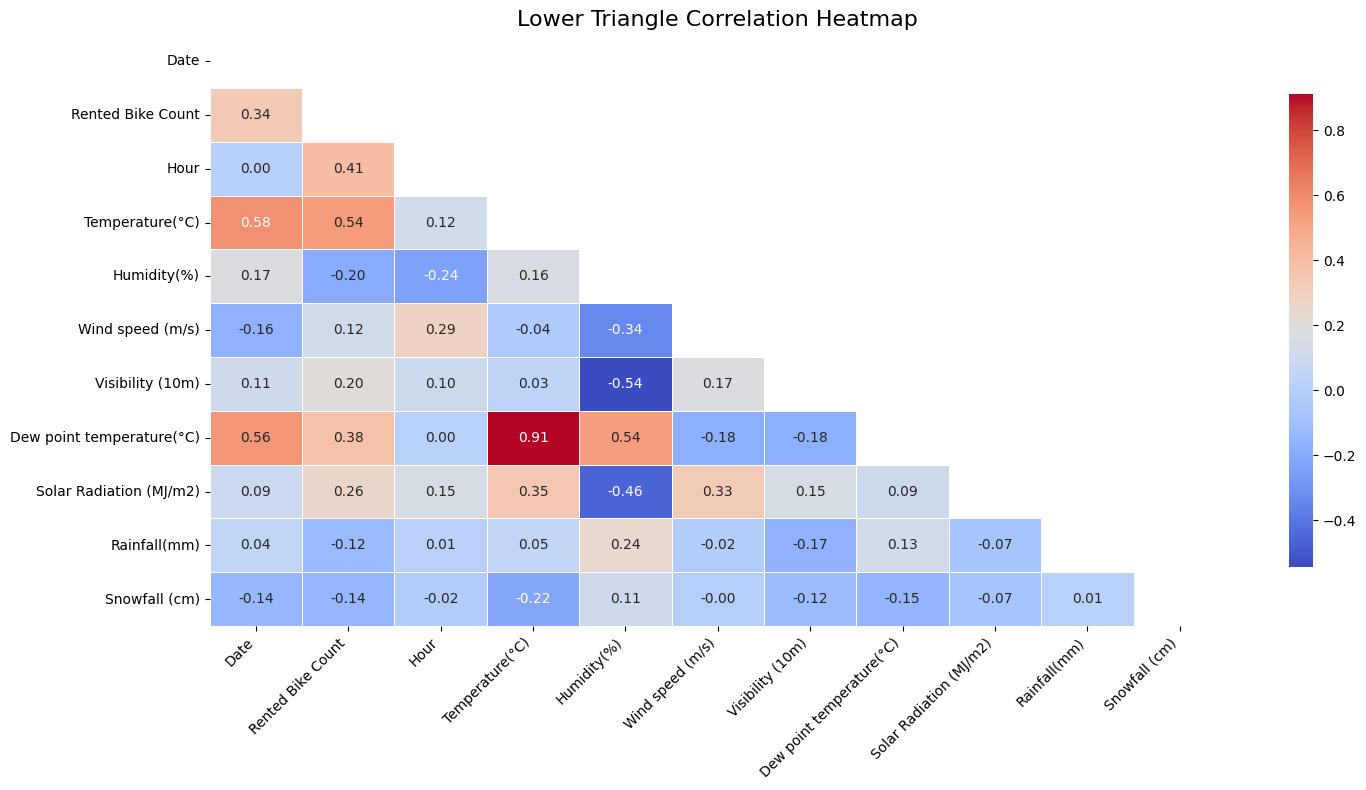

In [65]:
corr = df.select_dtypes(exclude='object').corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 8))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    mask=mask,  # Mask upper triangle
    square=False
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Lower Triangle Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

In [66]:
# we can observe correlation among independent variables as well  and a strong corrleation between dew point and temperature 

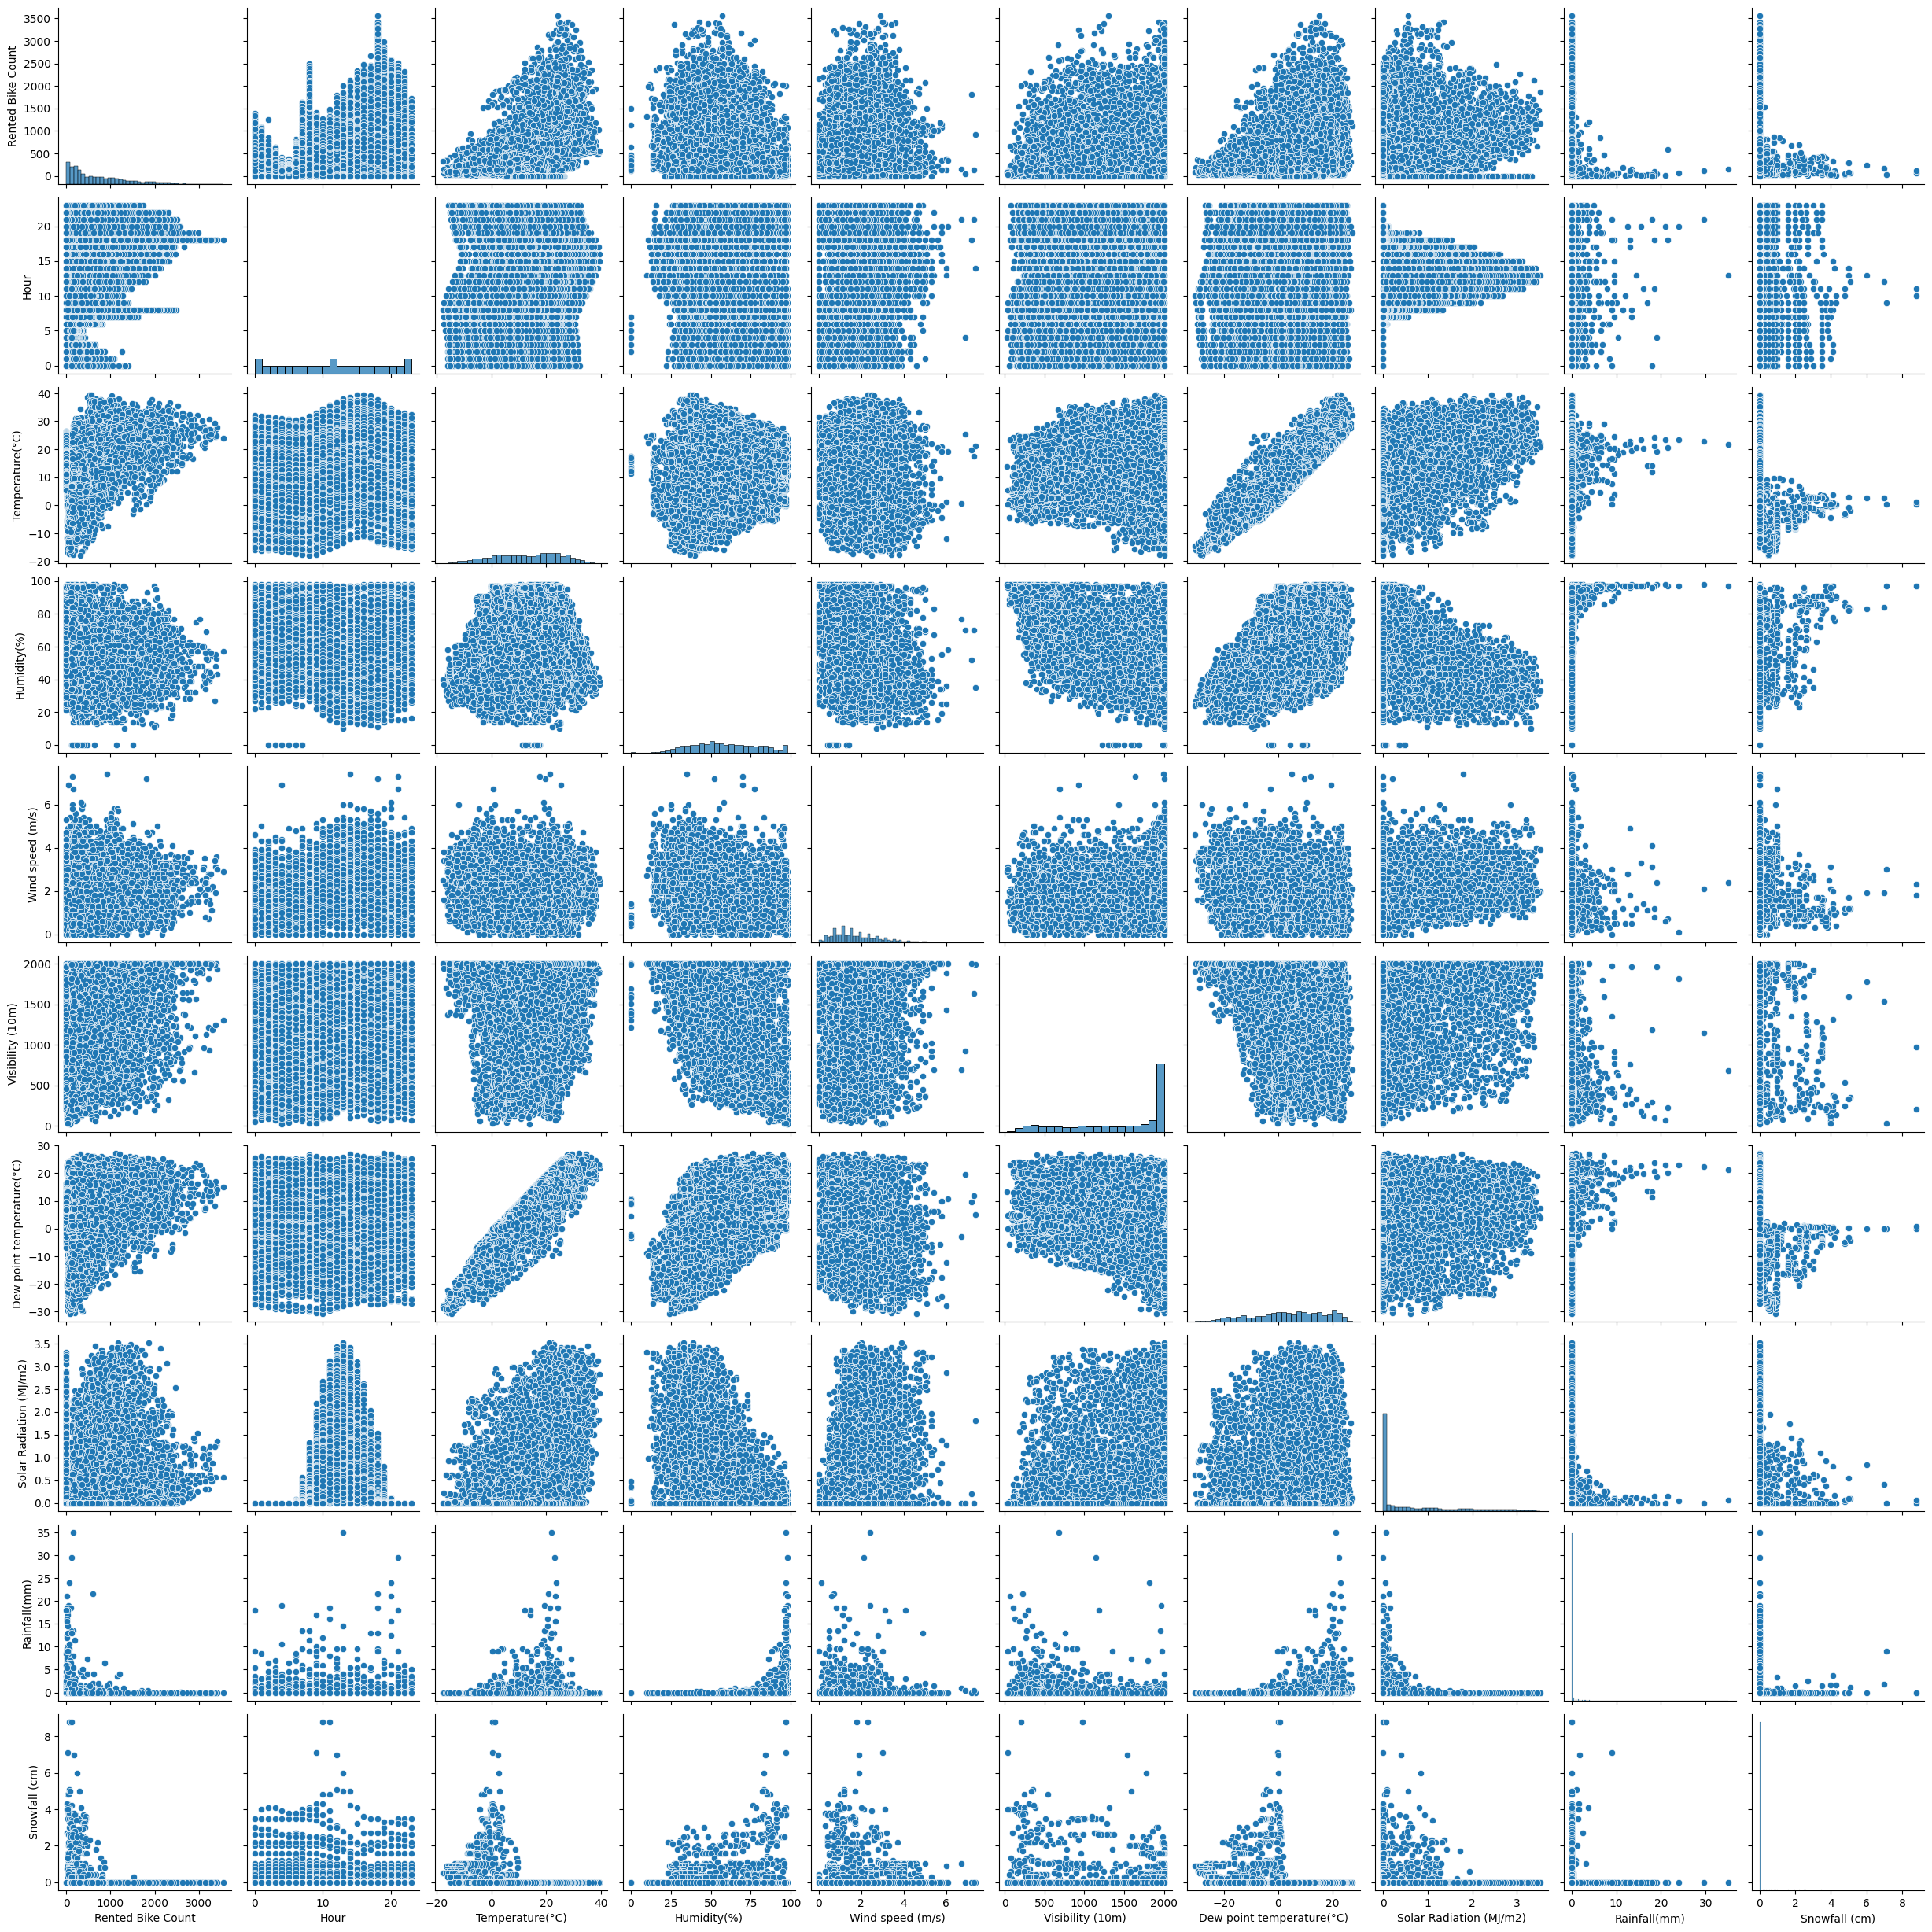

In [67]:
sns.pairplot(df)

In [68]:
# # we can drop one feature from temperature for dew temperature , to reduce the collinearity as they are strongly coorelated ,
# rest we can go with robust models like random fores and boosting 

In [69]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

Text(0.5, 1.0, 'Rented Bike Count Vs Temperature')

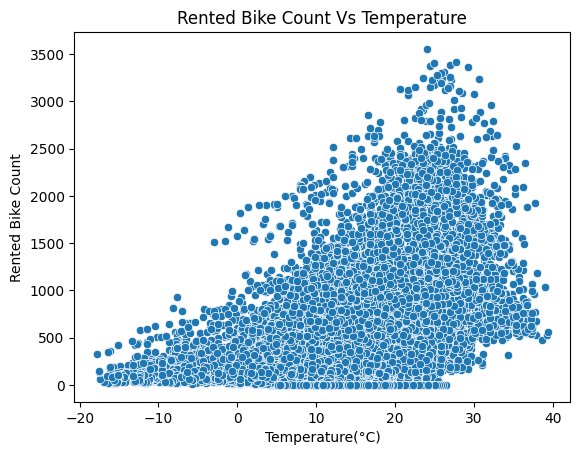

In [70]:
sns.scatterplot(data=df,x='Temperature(°C)',y='Rented Bike Count')
plt.title("Rented Bike Count Vs Temperature")

**Observations**
We can observe positive correlation between Temperature and rented bike count 

Text(0.5, 1.0, 'Dew point temperature(°C) Vs Temperature')

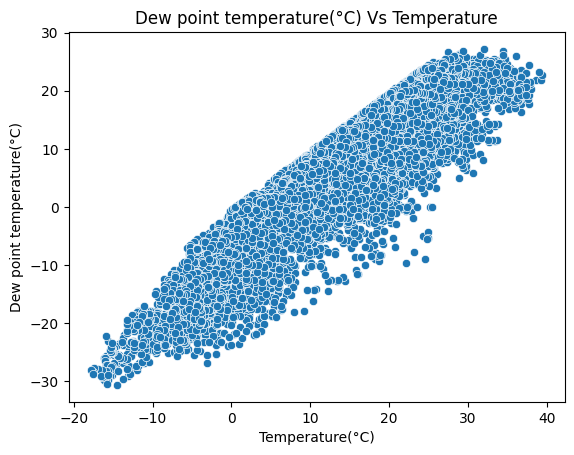

In [71]:
sns.scatterplot(data=df,x='Temperature(°C)',y='Dew point temperature(°C)')
plt.title("Dew point temperature(°C) Vs Temperature")

# very correlation existing between temperature and dew point temperature , we can drop one of them 

### Feature Engineering

In [72]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [73]:
# Extracting day , month , year, weekday  from date column and dropping the date columnn

In [74]:
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] =  df.Date.dt.day
df['Weekday'] =  df.Date.dt.weekday
# Calculate week of the month (starting with 1)
df['Week_of_month'] = ((df['Day'] - 1) // 7) + 1


#Droping Date column 
df.drop(columns='Date',inplace=True)

df.head()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,Weekday,Week_of_month
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,1


### Data Preprocessing

In [82]:
df.shape

(8760, 20)

In [76]:
# Encode Seasons column using one hot encoding
seasons = pd.get_dummies(df['Seasons'], prefix='season', drop_first=True).astype(int)

# Merging the dummy columns created to data set 
df=pd.concat([df,seasons],axis=1)

#droping the Original Columns seasons
df.drop(columns='Seasons',inplace=True)



In [77]:
# UseLabel Encoder for Holiday and Fucntioning Day to convert in numerical cols 
le = LabelEncoder()

df['Holiday']=le.fit_transform(df['Holiday'])
df['Functioning Day']= le.fit_transform(df['Functioning Day'])

df.head(3)


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Month,Day,Weekday,Week_of_month,season_Spring,season_Summer,season_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,1,2017,12,1,4,1,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,1,2017,12,1,4,1,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,1,2017,12,1,4,1,0,0,1


In [78]:
# since only two years are there ,making it into cols 

# df=pd.get_dummies(df, columns=['Year'], prefix='Year', drop_first=True).astype(int)

# df

Feature Selection 

In [81]:
# Using VIF to check the multicolliniearty


from statsmodels.stats.outliers_influence import variance_inflation_factor


def calculate_vif(df):
  vif_data=pd.DataFrame()
  vif_data["Feature"]=df.columns

  vif_values=[]
  for i in range(len(df.columns)):
    vif_values.append(variance_inflation_factor(df.values,i))

  vif_data['VIF']=vif_values

  return vif_data

vif_result=calculate_vif(df.drop(columns=['Rented Bike Count']))

vif_result


,Feature,VIF
0,Hour,4.552371
1,Temperature(°C),194.948771
2,Humidity(%),190.257134
3,Wind speed (m/s),4.932709
4,Visibility (10m),11.406578
5,Dew point temperature(°C),129.655796
6,Solar Radiation (MJ/m2),2.923380
7,Rainfall(mm),1.105143
8,Snowfall (cm),1.181536
9,Holiday,21.513566


In [83]:
def calculate_vif(df):
  vif_data=pd.DataFrame()
  vif_data["Feature"]=df.columns

  vif_values=[]
  for i in range(len(df.columns)):
    vif_values.append(variance_inflation_factor(df.values,i))

  vif_data['VIF']=vif_values

  return vif_data

vif_result=calculate_vif(df.drop(columns=['Rented Bike Count','Dew point temperature(°C)']))

vif_result

,Feature,VIF
0,Hour,4.547403
1,Temperature(°C),10.972805
2,Humidity(%),24.786188
3,Wind speed (m/s),4.924584
4,Visibility (10m),11.374361
5,Solar Radiation (MJ/m2),2.797187
6,Rainfall(mm),1.089900
7,Snowfall (cm),1.174922
8,Holiday,21.512911
9,Functioning Day,32.245337


In [ ]:
def calculate_vif(df):
  vif_data=pd.DataFrame()
  vif_data["Feature"]=df.columns

  vif_values=[]
  for i in range(len(df.columns)):
    vif_values.append(variance_inflation_factor(df.values,i))

  vif_data['VIF']=vif_values

  return vif_data

D

vif_result

,Feature,VIF
0,Hour,4.544735
1,Temperature(°C),10.915072
2,Humidity(%),24.783986
3,Wind speed (m/s),4.923666
4,Visibility (10m),11.368802
5,Solar Radiation (MJ/m2),2.796487
6,Rainfall(mm),1.089865
7,Snowfall (cm),1.172562
8,Functioning Day,32.232512
9,Year,120.965524


In [86]:
vif_result=calculate_vif(df.drop(columns=['Rented Bike Count','Dew point temperature(°C)','Holiday','Week_of_month','Visibility (10m)']))

vif_result

,Feature,VIF
0,Hour,4.520307
1,Temperature(°C),10.914745
2,Humidity(%),16.749478
3,Wind speed (m/s),4.886260
4,Solar Radiation (MJ/m2),2.656530
5,Rainfall(mm),1.088156
6,Snowfall (cm),1.172485
7,Functioning Day,32.231808
8,Year,77.622128
9,Month,8.355297


In [87]:
vif_result=calculate_vif(df.drop(columns=['Rented Bike Count','Dew point temperature(°C)','Functioning Day','Week_of_month','Visibility (10m)']))

vif_result

,Feature,VIF
0,Hour,4.520387
1,Temperature(°C),10.915730
2,Humidity(%),16.752201
3,Wind speed (m/s),4.882852
4,Solar Radiation (MJ/m2),2.657103
5,Rainfall(mm),1.088145
6,Snowfall (cm),1.173887
7,Holiday,20.857039
8,Year,72.433868
9,Month,8.388110


In [ ]:
vif_result=calculate_vif(df.drop(columns=['Rented Bike Count','Dew point temperature(°C)','Functioning Day','Week_of_month','Visibility (10m)','Year','Holiday']))

vif_result

# Now we can observe here , almost all high multicollinearity varaibles are removed and these variables stands good 

,Feature,VIF
0,Hour,4.275794
1,Temperature(°C),10.575253
2,Humidity(%),10.516972
3,Wind speed (m/s),4.539208
4,Solar Radiation (MJ/m2),2.514839
5,Rainfall(mm),1.071044
6,Snowfall (cm),1.143438
7,Month,6.421893
8,Day,3.909134
9,Weekday,3.129739


Feature Scaling 

In [97]:
df_linear_regression = df.loc[:, [
    'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
    'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
    'Snowfall (cm)', 'Month', 'Day', 'Weekday',
    'season_Spring', 'season_Summer', 'season_Winter'
]]


In [98]:
df_linear_regression.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day,Weekday,season_Spring,season_Summer,season_Winter
0,254,0,-5.2,37,2.2,0.0,0.0,0.0,12,1,4,0,0,1
1,204,1,-5.5,38,0.8,0.0,0.0,0.0,12,1,4,0,0,1
2,173,2,-6.0,39,1.0,0.0,0.0,0.0,12,1,4,0,0,1
3,107,3,-6.2,40,0.9,0.0,0.0,0.0,12,1,4,0,0,1
4,78,4,-6.0,36,2.3,0.0,0.0,0.0,12,1,4,0,0,1


<Axes: xlabel='Rented Bike Count', ylabel='Density'>

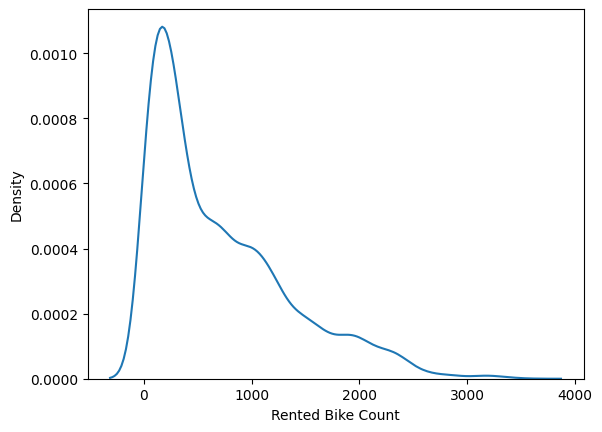

In [ ]:
# Check the output data for skweness 
sns.kdeplot(df_linear_regression['Rented Bike Count'])

# we can observer distribution is right skewed , applying log transformation here to reduce the skew and 
# linear model works well with noraml distribution data

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

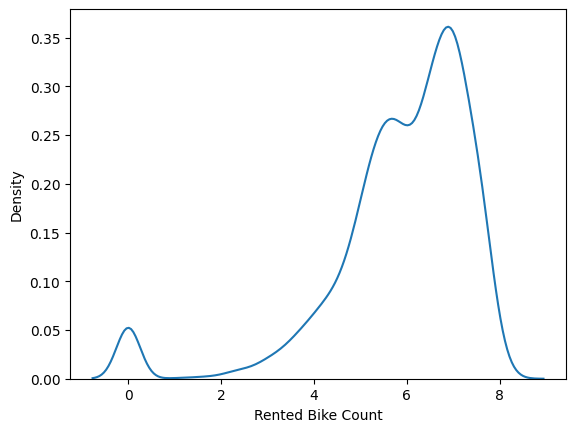

In [104]:
df_linear_regression['Rented Bike Count'] = np.log1p(df_linear_regression['Rented Bike Count'])

sns.kdeplot(df_linear_regression['Rented Bike Count'])

In [ ]:
# Using Standard scalar to scale independent variables 

df_linear_regression.columns



Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Month', 'Day', 'Weekday', 'season_Spring',
       'season_Summer', 'season_Winter'],
      dtype='object')

In [106]:
from sklearn.preprocessing import StandardScaler
# import pandas as pd



num_cols = [
    'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
    'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
    'Month', 'Day', 'Weekday'
]


dummy_cols = ['season_Spring', 'season_Summer','season_Winter'] 

# Separate out numerical and dummy features
X_num = df_linear_regression[num_cols]
X_dummy = df_linear_regression[dummy_cols]

# Scale only the numerical features
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=num_cols, index=df_linear_regression.index)

# Concatenate the scaled numerical features with dummy features
X_final_scaled = pd.concat([X_num_scaled, X_dummy], axis=1)

# View the scaled data
X_final_scaled.head()


,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day,Weekday,season_Spring,season_Summer,season_Winter
0,-1.661325,-1.513957,-1.042483,0.458476,-0.655132,-0.1318,-0.171891,1.587648,-1.673503,0.499144,0,0,1
1,-1.516862,-1.539074,-0.993370,-0.892561,-0.655132,-0.1318,-0.171891,1.587648,-1.673503,0.499144,0,0,1
2,-1.372399,-1.580936,-0.944257,-0.699556,-0.655132,-0.1318,-0.171891,1.587648,-1.673503,0.499144,0,0,1
3,-1.227936,-1.597680,-0.895144,-0.796059,-0.655132,-0.1318,-0.171891,1.587648,-1.673503,0.499144,0,0,1
4,-1.083473,-1.580936,-1.091596,0.554978,-0.655132,-0.1318,-0.171891,1.587648,-1.673503,0.499144,0,0,1


In [107]:
y=df_linear_regression['Rented Bike Count']

y.head()

0    5.541264
1    5.323010
2    5.159055
3    4.682131
4    4.369448
Name: Rented Bike Count, dtype: float64

Train Test split 

In [108]:
# Split your data to train and test.

from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split( X_final_scaled, y, test_size=0.2, random_state=42)
     

Model Preparation - Linear Regression

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE: {mae:.3f}")
print(f"Test R²: {r2:.3f}")



Test RMSE: 1.312
Test MAE: 0.799
Test R²: 0.289


In [111]:
# Predict on training data
y_train_pred = model.predict(X_train)

# Training RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Training MAE
train_mae = mean_absolute_error(y_train, y_train_pred)

# Training R²
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training RMSE: {train_rmse:.3f}")
print(f"Training MAE: {train_mae:.3f}")
print(f"Training R²: {train_r2:.3f}")

Training RMSE: 1.345
Training MAE: 0.820
Training R²: 0.279


In [112]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define parameter grid for alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Ridge Regression
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_

print(f"Best Ridge alpha: {ridge_grid.best_params_['alpha']}")
ridge_pred = best_ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f"Ridge Test RMSE: {ridge_rmse:.3f}")
print(f"Ridge Test MAE: {ridge_mae:.3f}")
print(f"Ridge Test R²: {ridge_r2:.3f}")

# Lasso Regression
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_

print(f"\nBest Lasso alpha: {lasso_grid.best_params_['alpha']}")
lasso_pred = best_lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f"Lasso Test RMSE: {lasso_rmse:.3f}")
print(f"Lasso Test MAE: {lasso_mae:.3f}")
print(f"Lasso Test R²: {lasso_r2:.3f}")


Best Ridge alpha: 10
Ridge Test RMSE: 1.312
Ridge Test MAE: 0.799
Ridge Test R²: 0.289

Best Lasso alpha: 0.001
Lasso Test RMSE: 1.312
Lasso Test MAE: 0.799
Lasso Test R²: 0.289


Observations 
- Low R² values (~0.28–0.29) — meaning they explain less than 30% of the variation in bike demand.

- Very similar performance across all linear variants, even after hyperparameter tuning — suggesting the limitations are in the model's assumptions, not in the tuning.